In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/project-ea/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'
bitcoin_dataset = pd.read_csv(path_to_dataset)

In [ ]:
#showing the data
bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
bitcoin_dataset.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
#checking for nulls
bitcoin_dataset.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
#we need to know about how much percent of data is required for proper dataset
bitcoin_dataset.isnull().mean().round(4) * 100

Timestamp             0.0
Open                 25.6
High                 25.6
Low                  25.6
Close                25.6
Volume_(BTC)         25.6
Volume_(Currency)    25.6
Weighted_Price       25.6
dtype: float64

In [ ]:
#in each row we have like 28% null values. Even though it's lot of null data, it's still invalid and so safe to delete!!!
bitcoin_dataset.dropna(inplace=True)

In [ ]:
#now we can inspect the null free dataser!!
bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
#for more visualization, we need to import seaborn and matplotlib
import seaborn as sbn
import matplotlib.pyplot as plt

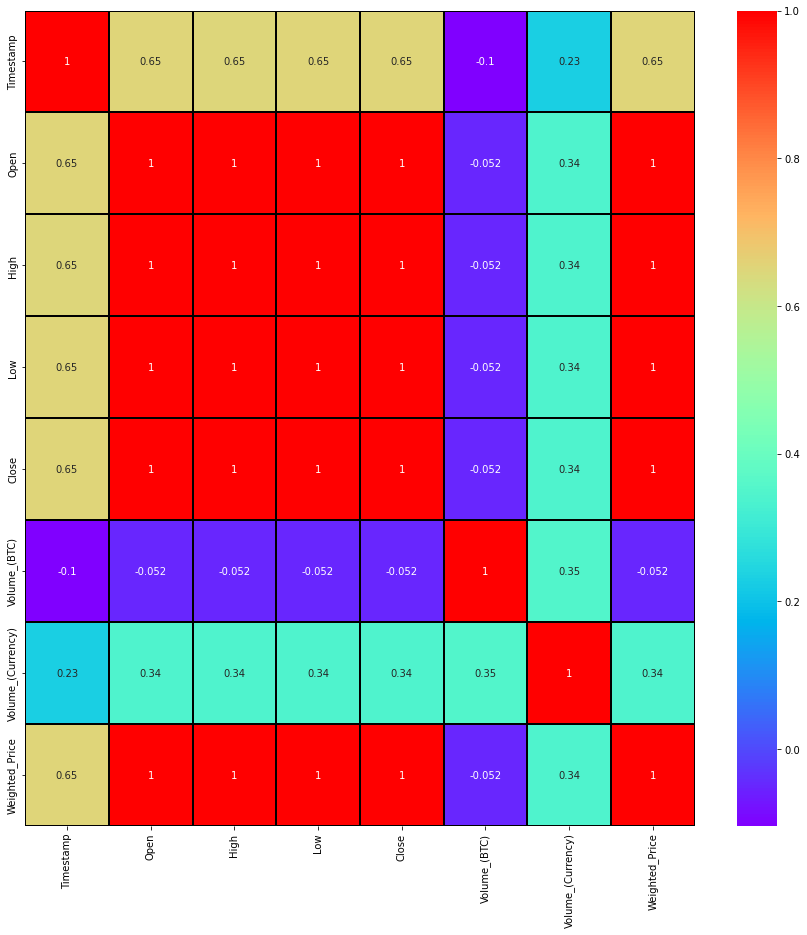

In [ ]:
#correlation helps us to find out which of the fields are related to each other..
plt.figure(figsize=(15, 15))
sbn.heatmap(bitcoin_dataset.corr(), annot=True, cmap='rainbow', linewidths=1, linecolor='black')

In [ ]:
#we should change the names of column just in case to avoid any feature errors
bitcoin_dataset.rename(columns={"Volume_(BTC)" : "Volume_BTC", "Volume_(Currency)" : "Volume_Currency"}, inplace=True)

In [ ]:
#similarly, we need to get the timestamp values to be human understandable
bitcoin_dataset['New_Dates'] = pd.to_datetime(bitcoin_dataset['Timestamp'], unit='s')

bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,New_Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


In [ ]:
required_features = ['Open', 'High', 'Low', 'Volume_BTC', 'Volume_Currency', 'Weighted_Price']
output_label = 'Close'

In [ ]:
bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,New_Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


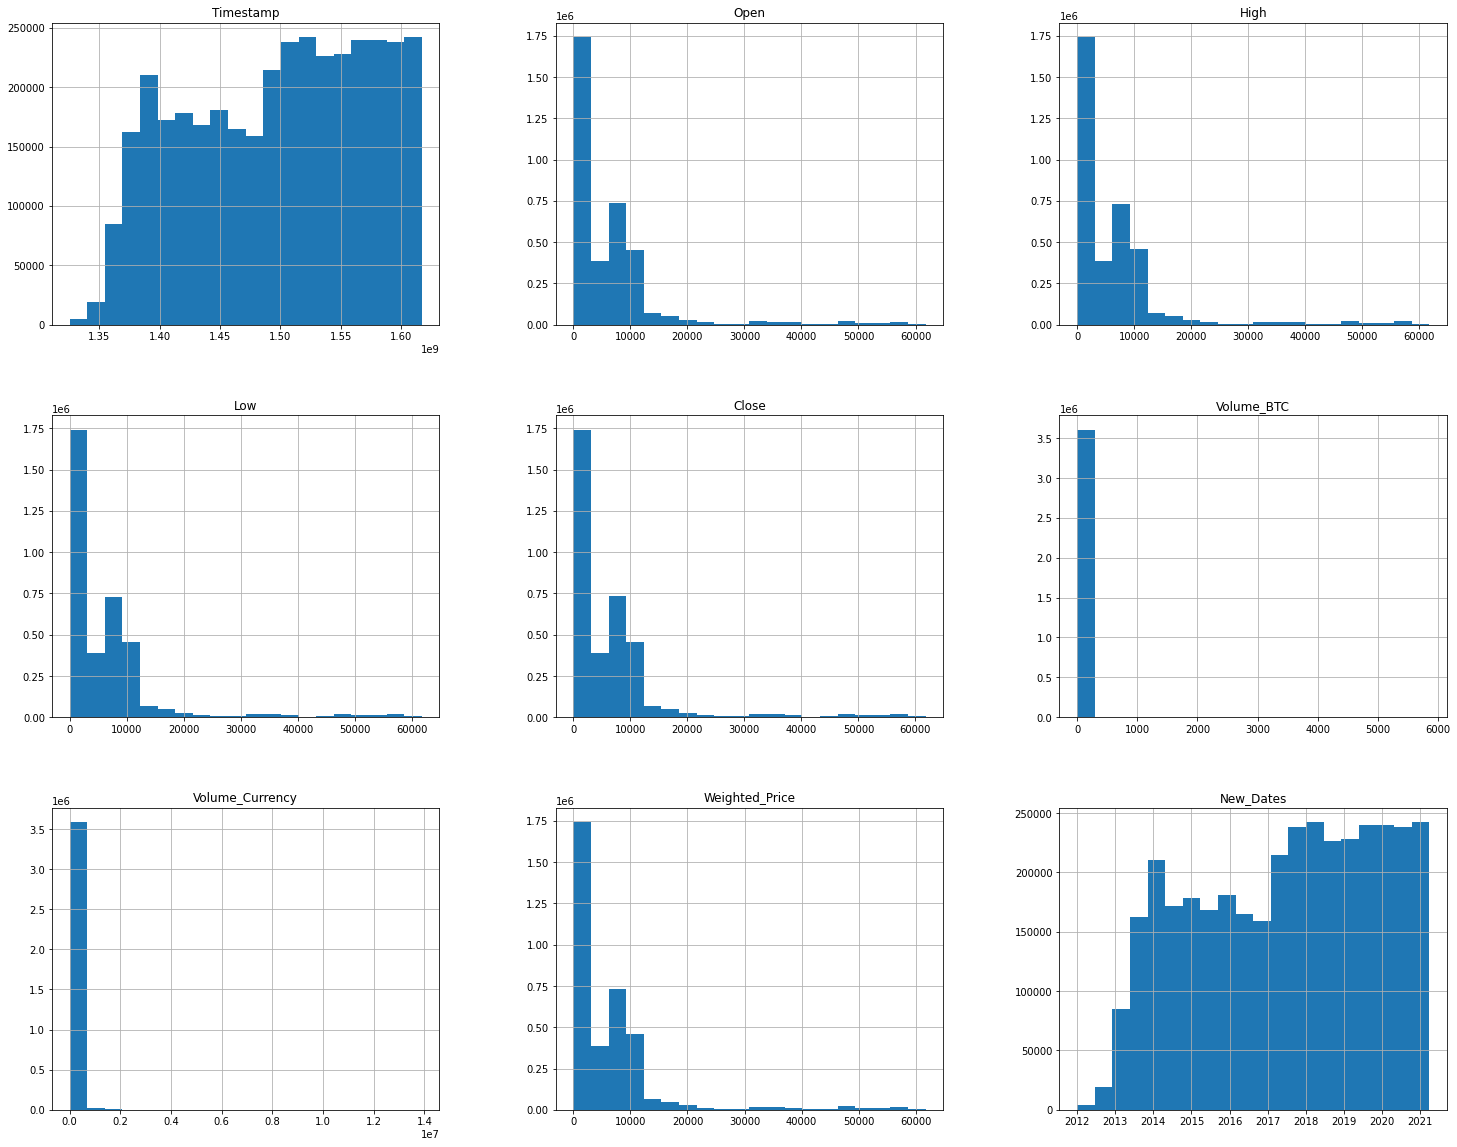

In [ ]:
bitcoin_dataset.hist(bins=20, legend=False, figsize=(25, 20))
plt.show()

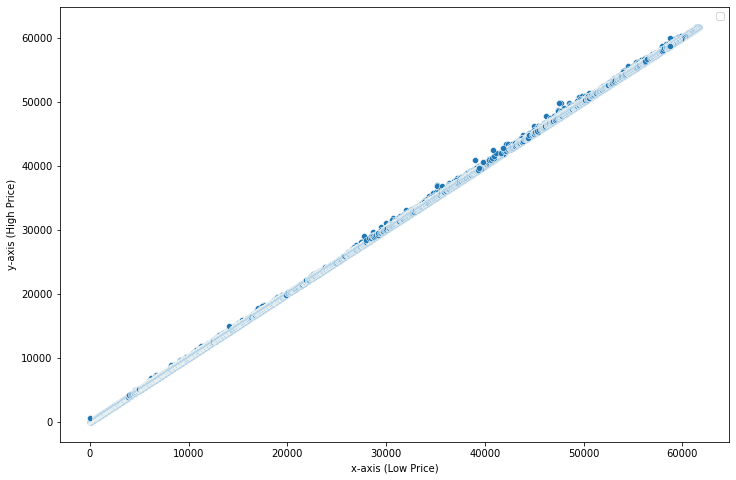

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.scatterplot(x='Low', y='High', data=bitcoin_dataset)
plt.xlabel("x-axis (Low Price)")
plt.ylabel("y-axis (High Price)")
plt.legend()
plt.show()

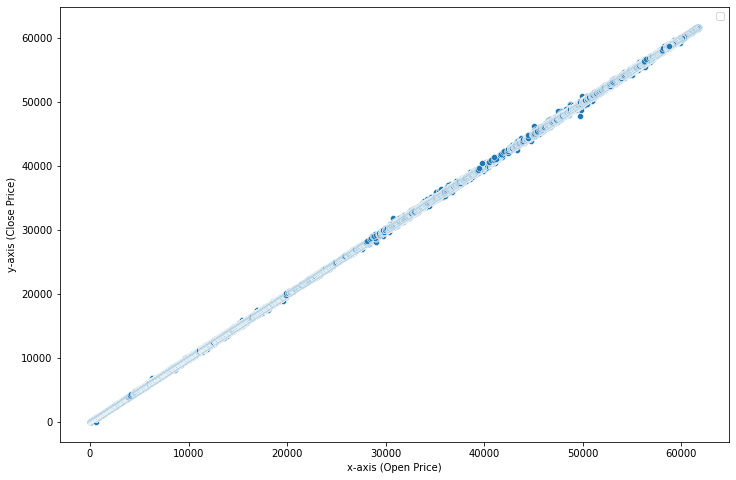

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Open', y='Close', data=bitcoin_dataset)
plt.xlabel("x-axis (Open Price)")
plt.ylabel("y-axis (Close Price)")
plt.legend()
plt.show()

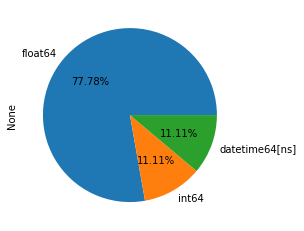

In [ ]:
bitcoin_dataset.dtypes.value_counts().plot.pie(autopct=('%0.2f%%'))

In [ ]:
all_cols = bitcoin_dataset.select_dtypes(include=('float','int')).columns
float_data = bitcoin_dataset.select_dtypes(include=('float')).columns
float_data

Index(['Open', 'High', 'Low', 'Close', 'Volume_BTC', 'Volume_Currency',
       'Weighted_Price'],
      dtype='object')

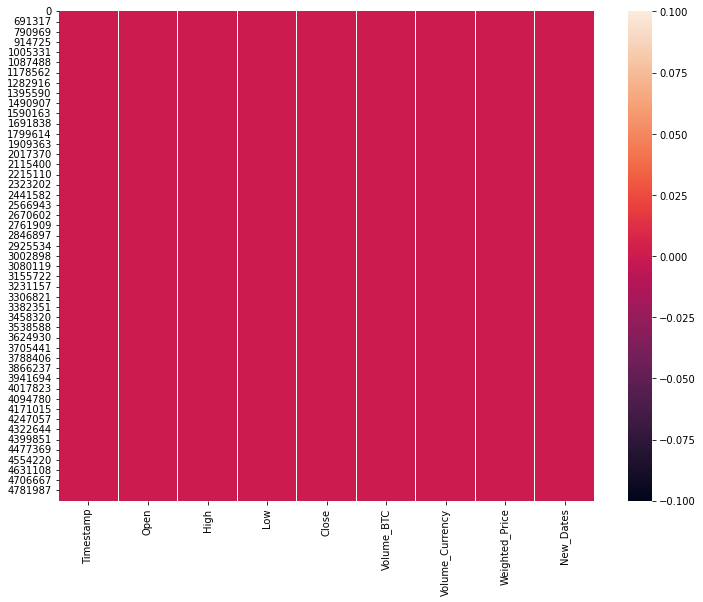

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(bitcoin_dataset.isnull())

In [ ]:
def plotfig(data):
    plt.figure(figsize = (16,8))
    plt.plot(data["Weighted_Price"])
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('Weighted_Price',fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

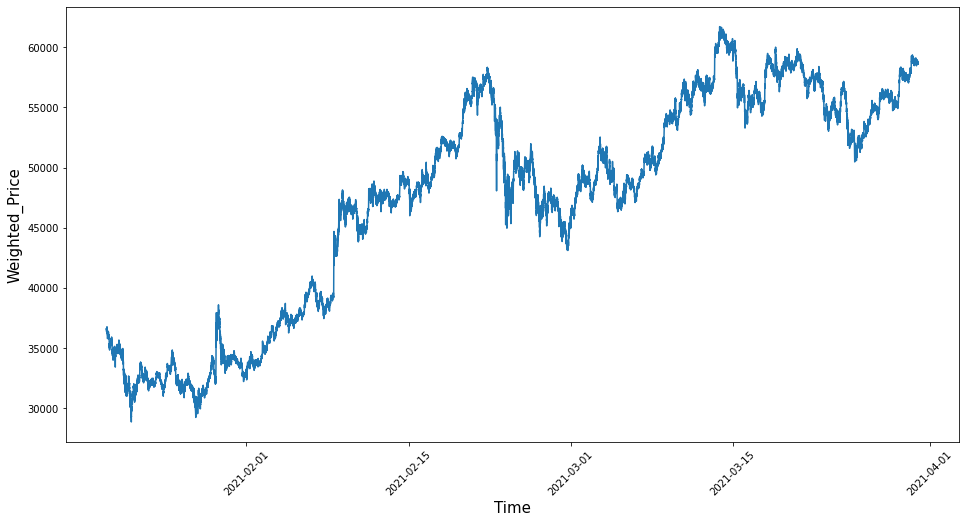

(100800, 8)
No. of days:  70.0


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
bitcoin_dataset["Timestamp"] = pd.to_datetime(bitcoin_dataset["Timestamp"], infer_datetime_format=True, unit="s")
data = bitcoin_dataset.set_index("Timestamp")

# Considering data of last 70 days only
freq = 60
c = int(60/freq)
days = 70

data = data.tail(days*24*60)
plotfig(data)
print(data.shape)

#taking interval of 10 minutes

data = data[::freq]
data.dropna(axis=0,inplace=True)

data = data["Weighted_Price"]

data = data.values.reshape(-1,1)
print("No. of days: ",data.shape[0]/(24*c))

Text(0, 0.5, '$ Price')

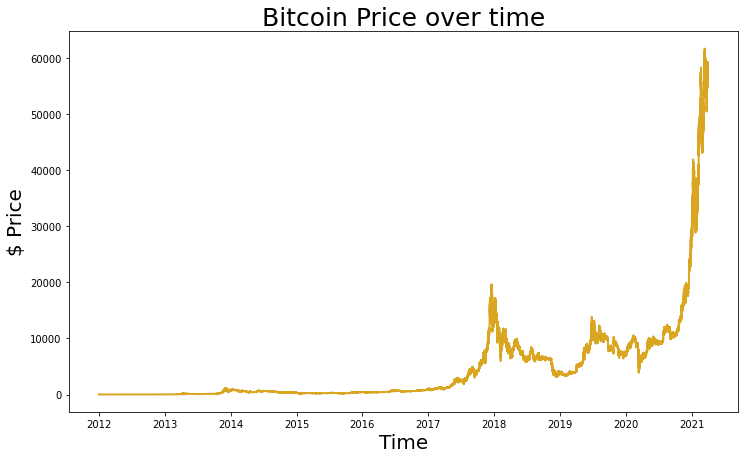

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_dataset["Timestamp"], bitcoin_dataset["Weighted_Price"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

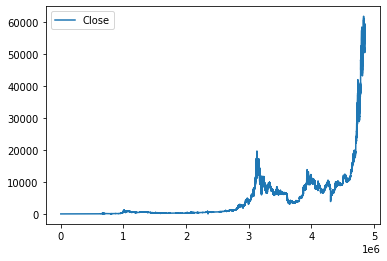

In [ ]:
#Plot the close price in time
Close = pd.DataFrame(bitcoin_dataset.Close)
Close.index = bitcoin_dataset.index
Close.plot()

In [ ]:
#Create a new column with the previous close price
Close['Lag_1'] = Close['Close'].shift(1)
Close = Close.reindex(columns=['Close', 'Lag_1'])

Text(0.5, 1.0, 'Lag Plot of Close')

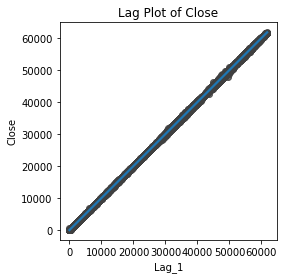

In [ ]:
#Plot the previous and the current price 
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Close', data=Close, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Close')

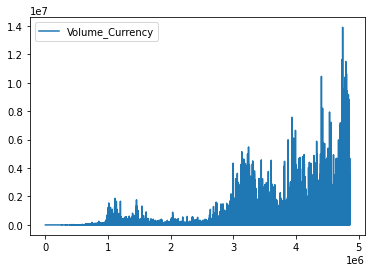

In [ ]:
Volume_Curency = pd.DataFrame(bitcoin_dataset['Volume_Currency'])
Volume_Curency.index = bitcoin_dataset.index
Volume_Curency.plot()

In [ ]:
Volume_Curency['Lag_1'] = Volume_Curency['Volume_Currency'].shift(1)
Volume_Curency = Volume_Curency.reindex(columns=['Volume_Currency', 'Lag_1'])

Text(0.5, 1.0, 'Lag Plot of Volume Curency')

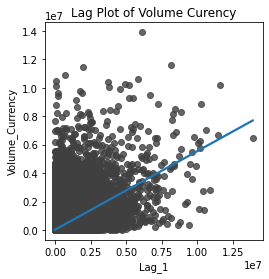

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Volume_Currency', data=Volume_Curency, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Volume Curency')

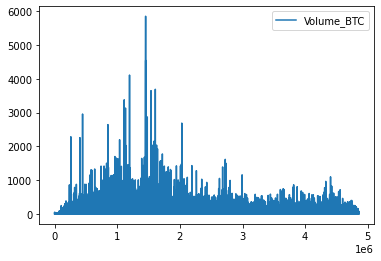

In [ ]:
Volume = pd.DataFrame(bitcoin_dataset['Volume_BTC'])
Volume.index = bitcoin_dataset.index
Volume.plot()

In [ ]:
Volume['Lag_1'] = Volume['Volume_BTC'].shift(1)
Volume = Volume.reindex(columns=['Volume_BTC', 'Lag_1'])

Text(0.5, 1.0, 'Lag Plot of Volume BTC')

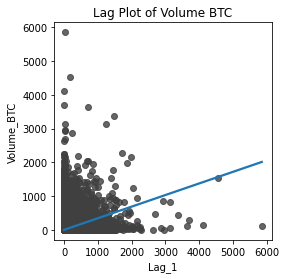

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Volume_BTC', data=Volume, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Volume BTC')

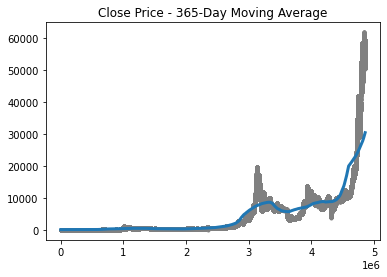

In [ ]:
moving_average = Close['Close'].rolling(
    window=60*24*365,                    # 365-day window
    center=True,                        # puts the average at the center of the window
    min_periods=int((60*24*365) / 2),  # choose about half the window size
).mean()                              # compute the mean (could also do median, std, min, max, ...)

ax = Close['Close'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Close Price - 365-Day Moving Average", legend=False,
);

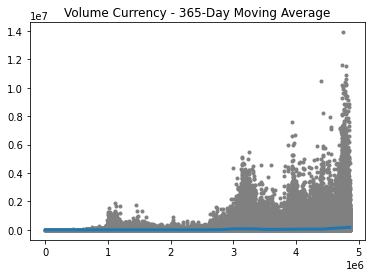

In [ ]:
moving_average = Volume_Curency['Volume_Currency'].rolling(
    window=60*24*365,                           # 365-day window
    center=True,                               # puts the average at the center of the window
    min_periods=int((60*24*365) / 2),         # choose about half the window size
).mean()                                     # compute the mean (could also do median, std, min, max, ...)

ax = Volume_Curency['Volume_Currency'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Volume Currency - 365-Day Moving Average", legend=False,
);

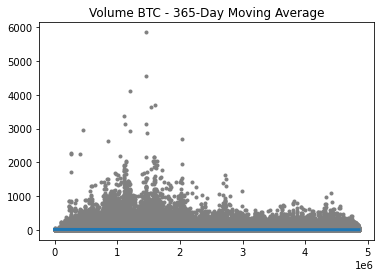

In [ ]:
moving_average = Volume['Volume_BTC'].rolling(
    window=60*24*365,                        # 365-day window
    center=True,                            # puts the average at the center of the window
    min_periods=int((60*24*365) / 2),      # choose about half the window size
).mean()                                  # compute the mean (could also do median, std, min, max, ...)

ax = Volume['Volume_BTC'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Volume BTC - 365-Day Moving Average", legend=False,
);

In [ ]:
#Helper fuctions
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)



In [ ]:
Close = Close.drop('Lag_1', axis = 1)
Volume_Curency = Volume_Curency.drop('Lag_1', axis = 1)
Volume = Volume.drop('Lag_1', axis = 1)

In [ ]:
y = Close.Close.copy()
X = make_lags(y, lags=10).fillna(0.0)

# Five step forecast
y = make_multistep_target(y, steps=5).dropna()
y, X = y.align(X, join='inner', axis=0)

# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE Linear Regression: {train_rmse:.2f}\n" f"Test RMSE Linear Regression: {test_rmse:.2f}"))

Train RMSE Linear Regression: 13.51
Test RMSE Linear Regression: 47.23


In [ ]:
y_test

,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5
3941685,11906.57,11921.54,11907.46,11916.60,11916.57
3941686,11921.54,11907.46,11916.60,11916.57,11923.89
3941687,11907.46,11916.60,11916.57,11923.89,11921.42
3941688,11916.60,11916.57,11923.89,11921.42,11932.26
3941689,11916.57,11923.89,11921.42,11932.26,11924.30
...,...,...,...,...,...
4857367,58699.90,58698.50,58739.95,58714.31,58686.00
4857369,58698.50,58739.95,58714.31,58686.00,58685.81
4857370,58739.95,58714.31,58686.00,58685.81,58723.84
4857371,58714.31,58686.00,58685.81,58723.84,58760.59


In [ ]:
y = Volume_Curency['Volume_Currency'].copy()
X = make_lags(y, lags=10).fillna(0.0)

# Five step forecast
y = make_multistep_target(y, steps=5).dropna()
y, X = y.align(X, join='inner', axis=0)

# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 77926.03
Test RMSE: 211690.65


In [ ]:
y = Volume['Volume_BTC'].copy()
X = make_lags(y, lags=10).fillna(0.0)

# Five step forecast
y = make_multistep_target(y, steps=5).dropna()
y, X = y.align(X, join='inner', axis=0)

# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

Train RMSE: 32.03
Test RMSE: 14.49


In [ ]:
from sklearn.linear_model import ElasticNet
y = Volume['Volume_BTC'].copy()
X = make_lags(y, lags=10).fillna(0.0)

# Five step forecast
y = make_multistep_target(y, steps=5).dropna()
y, X = y.align(X, join='inner', axis=0)

# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = ElasticNet()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE DecisionTreeRegressor: {train_rmse:.2f}\n" f"Test RMSE DecisionTreeRegressor: {test_rmse:.2f}"))

Train RMSE DecisionTreeRegressor: 32.03
Test RMSE DecisionTreeRegressor: 14.49


In [ ]:
#scaling

scaler_train = MinMaxScaler(feature_range=(0, 1))
data = scaler_train.fit_transform(data)

In [ ]:
# Train-test split

train_split_time = 30*24*c
test_split_time = 50*24*c

train_data = data[:train_split_time]
valid_data = data[train_split_time:test_split_time]
test_data = data[test_split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
data.shape

(1680, 1)

In [ ]:
Total = ['Open', 'High', 'Low', 'Close','Volume_BTC', 'Volume_Currency', 'Weighted_Price']
btc_new_x = ['Open', 'High', 'Low', 'Volume_BTC', 'Volume_Currency', 'Weighted_Price']
btc_new_y = ['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( bitcoin_dataset[btc_new_x], bitcoin_dataset[btc_new_x], test_size = 0.3)

In [ ]:
regression_model = LinearRegression()
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#our model is ready!! Time to test accuracy!!!
regression_model.score(X_test, y_test)

1.0

In [ ]:
# We got 99% accuracy on our test data also..that means our model is quite good
#now we can test for actual predictions!!

#we will take some data from test set and try to predict that

#we will take row number 55 from our original dataset, i.e from one before splitting
sample_data = bitcoin_dataset.iloc[55]
sample_data

Timestamp          2012-01-06 18:42:00
Open                               6.4
High                               6.4
Low                                6.4
Close                              6.4
Volume_BTC                    9.110853
Volume_Currency              58.309457
Weighted_Price                     6.4
New_Dates          2012-01-06 18:42:00
Name: 9290, dtype: object

from above, it's clear that original price was 6.4 and out model predicted it as 6.4 which is pretty much equal

In [ ]:
#to make predictions of future values we will need to shift data by 30 days!!
future_set = bitcoin_dataset.shift(periods=30).tail(30)

In [ ]:
#similarly we can use r2_score to see our accuracy
predictions = regression_model.predict(X_test)
print('Accuracy of model : ', r2_score(predictions, y_test))


Accuracy of model :  1.0
